In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df=pd.read_csv(r'C:\Users\Madhu\Downloads\studentsPerformance.csv')

In [123]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [124]:
df.shape

(1000, 8)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [126]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [127]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# -rename race/ethnicity to ethnicity


In [128]:
df.rename(columns={'race/ethnicity':'ethnicity'},inplace=True)


In [129]:
df.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# -remove spaces in column names


In [158]:
df.columns=df.columns.str.replace(" ","_")
df.columns


Index(['gender', 'ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_marks', 'division'],
      dtype='object')

In [160]:
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
0,female,group B,bachelor's degree,standard,none,72,72,74,218,first division
1,female,group C,some college,standard,completed,69,90,88,247,first division
2,female,group B,master's degree,standard,none,90,95,93,278,first division
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Fail
4,male,group C,some college,standard,none,76,78,75,229,first division


# -clean null values if present


In [162]:
df.isna().sum()

gender                         0
ethnicity                      0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_marks                    0
division                       0
dtype: int64

# -explore unique values in catagorical columns


In [166]:
df[["gender","ethnicity","parental_level_of_education","lunch","test_preparation_course"]].apply(pd.Series.unique)


gender                                                            [female, male]
ethnicity                          [group B, group C, group A, group D, group E]
parental_level_of_education    [bachelor's degree, some college, master's deg...
lunch                                                   [standard, free/reduced]
test_preparation_course                                        [none, completed]
dtype: object

# -fix dtypes of the columns if needed


In [167]:
df.dtypes

gender                         object
ethnicity                      object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
total_marks                     int64
division                       object
dtype: object

# -replace 'none' to 'not completed' in test preration cource


In [171]:
df["test_preparation_course"].replace("none","not completed")
df

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
0,female,group B,bachelor's degree,standard,none,72,72,74,218,first division
1,female,group C,some college,standard,completed,69,90,88,247,first division
2,female,group B,master's degree,standard,none,90,95,93,278,first division
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Fail
4,male,group C,some college,standard,none,76,78,75,229,first division
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,first division
996,male,group C,high school,free/reduced,none,62,55,55,172,Fail
997,female,group C,high school,free/reduced,completed,59,71,65,195,first division
998,female,group D,some college,standard,completed,68,78,77,223,first division


# -check duplicate rows


In [172]:
df.duplicated().sum()


0

In [175]:
df['total_marks']=df.apply(lambda x: x['math_score'] +x ['reading_score'] +x ['writing_score'], axis = 1)
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
0,female,group B,bachelor's degree,standard,none,72,72,74,218,first division
1,female,group C,some college,standard,completed,69,90,88,247,first division
2,female,group B,master's degree,standard,none,90,95,93,278,first division
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Fail
4,male,group C,some college,standard,none,76,78,75,229,first division


# -add new column called division which gives studet 'first', 'second', 'third' or fail according to total marks.


In [180]:
df['division']=df.total_marks.apply(lambda x:'first division' 
                      if x >=180 else ('Second Division' if 150<=x>=179 else('Third Divison' if 90>=x<=149 else "Fail")))
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
0,female,group B,bachelor's degree,standard,none,72,72,74,218,first division
1,female,group C,some college,standard,completed,69,90,88,247,first division
2,female,group B,master's degree,standard,none,90,95,93,278,first division
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Fail
4,male,group C,some college,standard,none,76,78,75,229,first division


In [181]:
df.describe()

,math_score,reading_score,writing_score,total_marks
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


# EDA

# -Average marks of a student in all 3 subjects.


In [182]:
df["total_marks"].mean()


203.312

# -Which student got the highest marks in total?`


In [183]:
df.loc[df["total_marks"].idxmax()]

gender                                    female
ethnicity                                group E
parental_level_of_education    bachelor's degree
lunch                                   standard
test_preparation_course                     none
math_score                                   100
reading_score                                100
writing_score                                100
total_marks                                  300
division                          first division
Name: 458, dtype: object

# -which student got the lowest marks in total?


In [184]:
df.loc[df["total_marks"].idxmin()]

gender                                   female
ethnicity                               group C
parental_level_of_education    some high school
lunch                              free/reduced
test_preparation_course                    none
math_score                                    0
reading_score                                17
writing_score                                10
total_marks                                  27
division                          Third Divison
Name: 59, dtype: object

In [185]:
df.sort_values('total_marks', ascending=False).head(4)


,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,first division
458,female,group E,bachelor's degree,standard,none,100,100,100,300,first division
962,female,group E,associate's degree,standard,none,100,100,100,300,first division
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,first division


In [186]:
df.sort_values('total_marks', ascending=True).head(4)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
59,female,group C,some high school,free/reduced,none,0,17,10,27,Third Divison
980,female,group B,high school,free/reduced,none,8,24,23,55,Third Divison
596,male,group B,high school,free/reduced,none,30,24,15,69,Third Divison
327,male,group A,some college,free/reduced,none,28,23,19,70,Third Divison


# -What is the average score of students in each subjects? hint: #make box plot of each subject


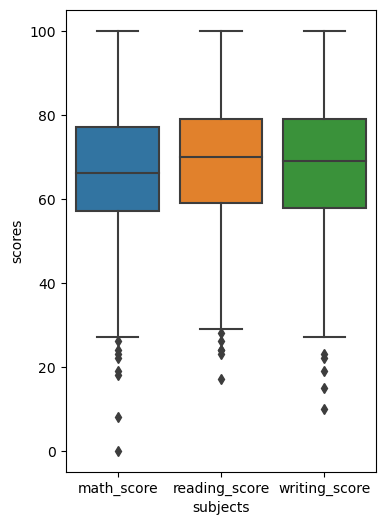

In [191]:
plot= pd.melt(frame = df, value_vars=['math_score','reading_score', 'writing_score'], var_name= 'subjects', value_name= 'scores')
plot
plt.figure(figsize= (4,6))
sns.boxplot(x = plot.subjects, y = plot.scores)
plt.show()


# -Ratio of Male and Female students. hint: #pie chart


In [193]:
sex=df.gender.value_counts()
sex

female    518
male      482
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x1c55db0f880>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.80%'),
  Text(0.033911133252536786, -0.5990409293541875, '48.20%')])

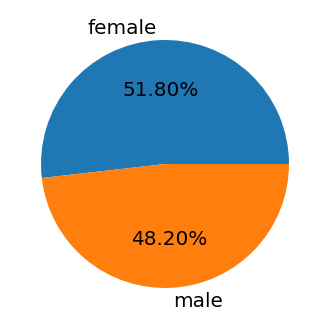

In [195]:
plt.figure(figsize=(4,8))
plt.pie(x=sex,labels = sex.index, autopct = "%0.2f%%", textprops = {'size': 'x-large'})


# -Ratio of ethnicity of students. hint: # pie chart


In [196]:
group=df.ethnicity.value_counts()
group


group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

([<matplotlib.patches.Wedge at 0x1c55d746880>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3230859994074431, 0.5055842531041623, '31.90%'),
  Text(-0.5706339132489631, 0.18541018593964795, '26.20%'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.00%'),
  Text(0.32467274541824787, -0.5045667531482604, '14.00%'),
  Text(0.5766992522671516, -0.1655837323969605, '8.90%')])

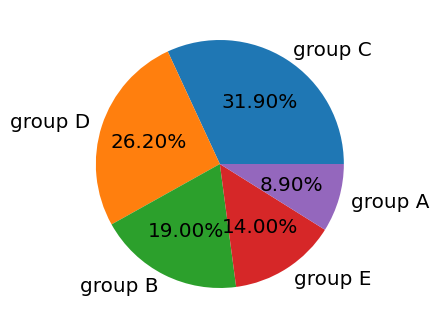

In [198]:
plt.figure(figsize=(4,8))
plt.pie(x=group,labels=group.index,autopct = "%0.2f%%", textprops = {'size': 'x-large'})

# -On an average which group performed the best in total marks? hint: group by then pivot table (col = gen, index= eth, val = total)


In [201]:
Pivot_Table=df.pivot_table(index="ethnicity", columns="gender", values="total_marks", aggfunc="mean")
Pivot_Table


gender,female,male
ethnicity,,
group A,195.388889,184.622642
group B,202.528846,189.000000
group C,205.755556,195.748201
group D,214.317829,200.962406
group E,222.188406,214.436620


# -Which gender perfomed better overall? hint: #bar plot


<AxesSubplot:xlabel='gender', ylabel='total_marks'>

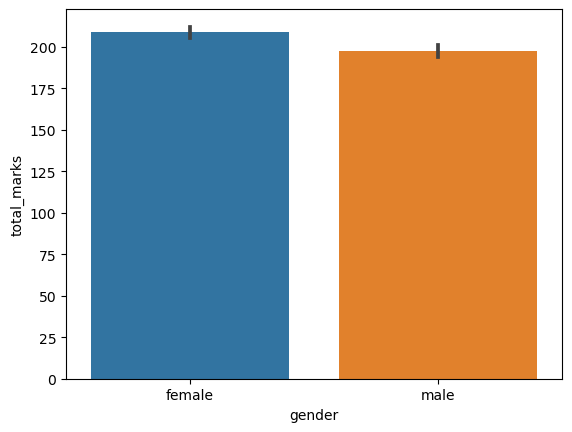

In [203]:
sns.barplot(data=df,x='gender',y='total_marks')


# -Which gender performed better in each group? hint: #bar


<AxesSubplot:xlabel='ethnicity', ylabel='total_marks'>

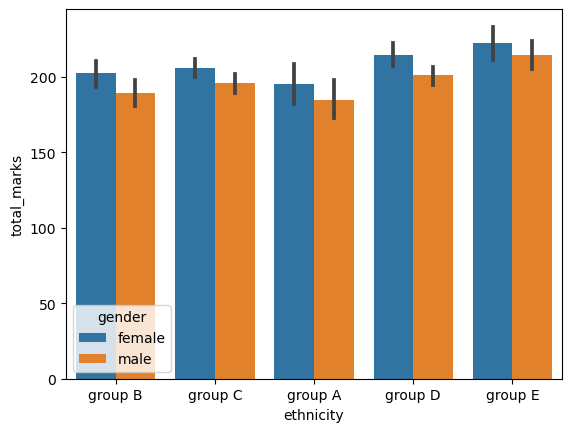

In [205]:
sns.barplot(data=df,x='ethnicity',y='total_marks',hue='gender')


# -How many students have failed and which group have the most?



In [207]:
b= df[df.division == 'Fail']
print(b.ethnicity.value_counts())

group C    93
group D    63
group B    53
group A    38
group E    23
Name: ethnicity, dtype: int64


# -Students got more marks than others whose parents have higer education degree?


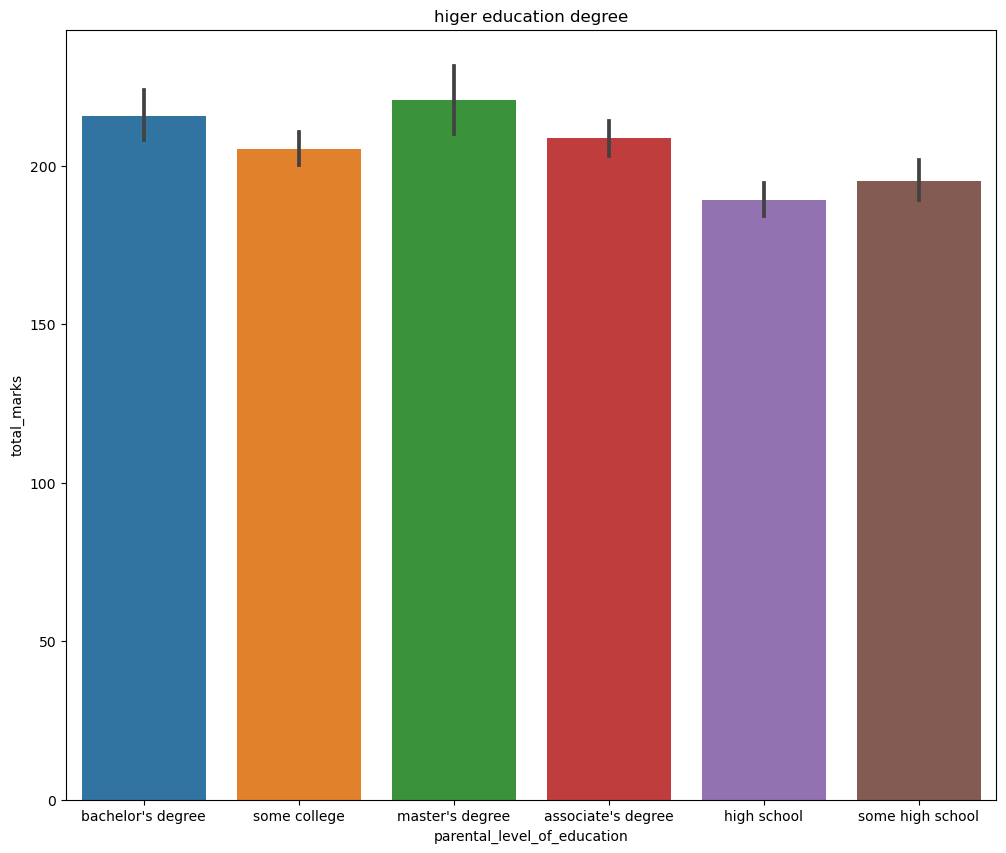

In [210]:
plt.figure(figsize=(12,10))
sns.barplot(data =df,x='parental_level_of_education',y='total_marks')
plt.title("higer education degree")
plt.show()


# -Those students whose completed their course got more grades in compare to those student who didn't?


In [211]:
df.test_preparation_course.value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64